In [ ]:
# Ellen Davenport April 2025
# This script plots the TPOSE region and estimates the difference between TPOSE and OISST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cmocean.cm as cmo
from open_tpose import tpose2012to2013

prefix = ['diag_state','diag_surf']
ds = tpose2012to2013(prefix)
ds['time'] = range(len(ds.time))

/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/dask/array/core.py:4918: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(


mar2013/diags_daily/
may2013/diags_daily/
jul2013/diags_daily/
sep2013/diags_daily/
nov2013/diags_daily/
Days in 2012-2013: (should be 731)
731


In [2]:
from open_oisst import oisst2012to2013

oisst_data = oisst2012to2013()
print(oisst_data.shape)
oisst_data = oisst_data.transpose(2,1,0)

# add oisst data to ds and set the dimensions to be ds.time ds.XC and ds.YC
ds['oisst'] = (('time','YC','XC'), oisst_data)

(1128, 336, 731)


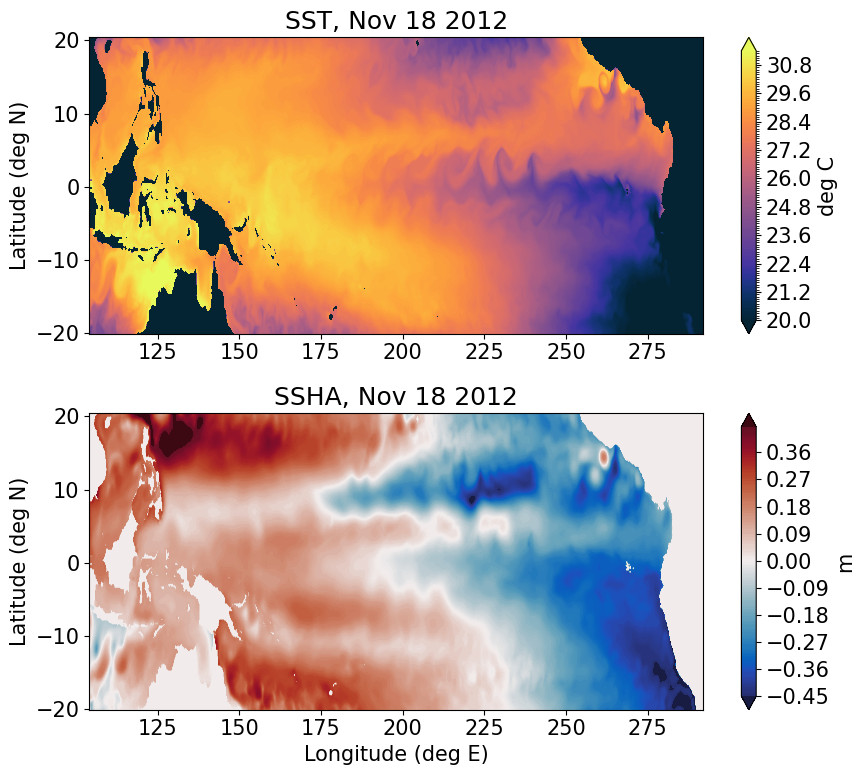

In [7]:
from matplotlib.colors import TwoSlopeNorm
plt.rcParams['font.size'] = 16

latMin = -20.0
latMax = 20.5

lats = ds.YC.data

latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1

levels = np.arange(20.0,31.5,0.1)
fig, ax = plt.subplots(figsize=(9,8),nrows=2)
ds.THETA[333,0,latli:latui,:].plot.contourf(ax=ax[0],cmap=cmo.thermal,levels=levels,cbar_kwargs={'label':'deg C'})
# ax[0].scatter(220.0,0.0,marker='*',color='tab:green',s=230)
ax[0].set_title('SST, Nov 18 2012')
ax[0].set_ylabel('Latitude (deg N)')
ax[0].set_xlabel('')
levels = np.arange(-0.45,0.45,0.005)
ds.ETAN[333,latli:latui,:].plot.contourf(ax=ax[1],cmap=cmo.balance,levels=levels,cbar_kwargs={'label':'m'},norm=TwoSlopeNorm(vmin=-0.5,vcenter=0,vmax=0.5))
# ax[1].scatter(220.0,0.0,marker='*',color='tab:green',s=230)
ax[1].set_title('SSHA, Nov 18 2012')
ax[1].set_ylabel('Latitude (deg N)')
ax[1].set_xlabel('Longitude (deg E)')
plt.tight_layout()

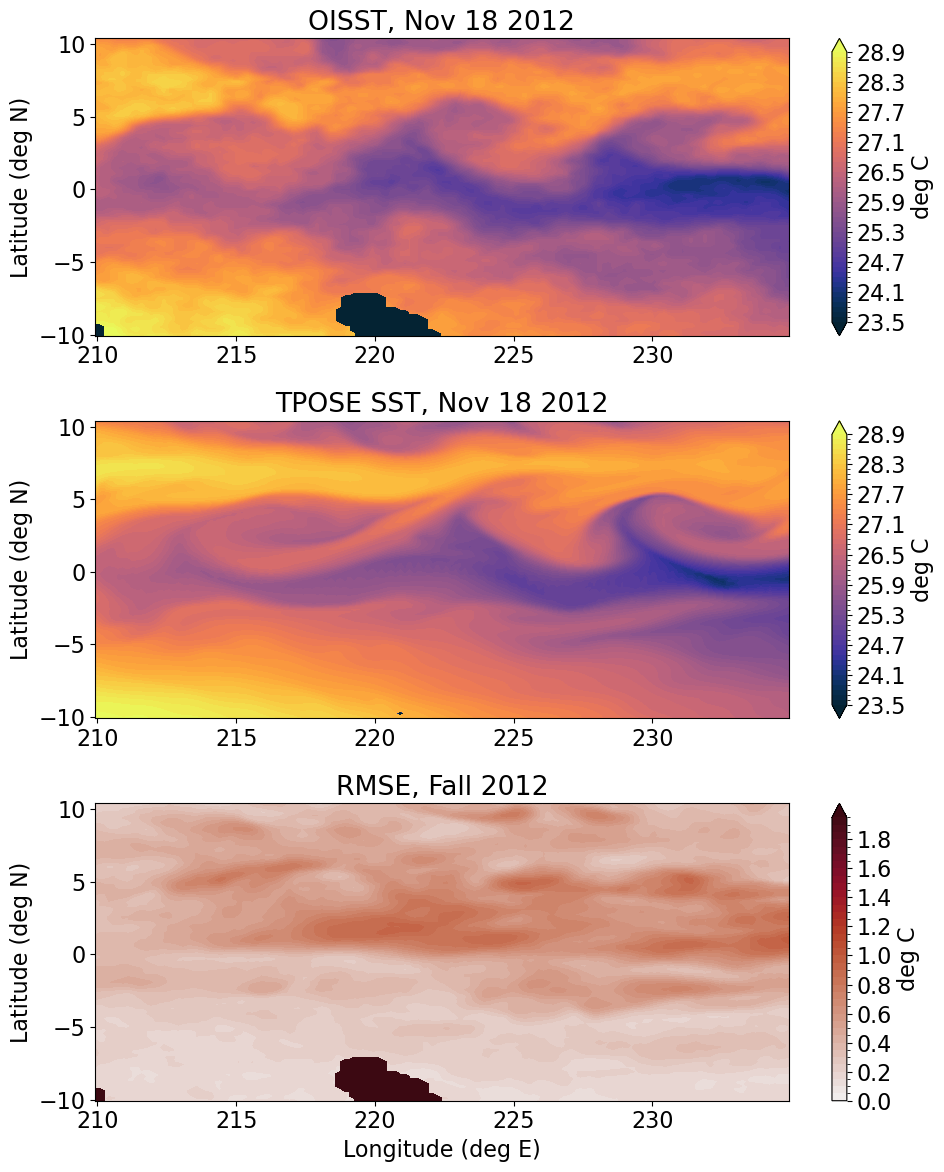

In [8]:
from matplotlib.colors import TwoSlopeNorm
plt.rcParams['font.size'] = 16

latMin = -10.0
latMax = 10.5
lonMin = 210.0
lonMax = 235.0

lats = ds.YC.data
lons = ds.XC.data

latli = np.argmin(np.abs(lats - latMin))
latui = np.argmin(np.abs(lats - latMax)) + 1
lonli = np.argmin(np.abs(lons - lonMin))
lonui = np.argmin(np.abs(lons - lonMax)) + 1

diff = (ds.THETA[274:366,0,latli:latui,lonli:lonui] - ds.oisst[274:366,latli:latui,lonli:lonui]).mean(dim='time')
RMSE = np.sqrt(((ds.THETA[274:366,0,latli:latui,lonli:lonui] - ds.oisst[274:366,latli:latui,lonli:lonui])**2).mean(dim='time'))


levels = np.arange(23.5,29.0,0.1)
fig, ax = plt.subplots(figsize=(10,10),nrows=3)
ds.THETA[333,0,latli:latui,lonli:lonui].plot.contourf(ax=ax[1],cmap=cmo.thermal,levels=levels,cbar_kwargs={'label':'deg C'})
ax[1].set_title('TPOSE SST, Nov 18 2012')
ax[1].set_ylabel('Latitude (deg N)')
ax[1].set_xlabel('')
ds.oisst[333,latli:latui,lonli:lonui].plot.contourf(ax=ax[0],cmap=cmo.thermal,levels=levels,cbar_kwargs={'label':'deg C'})
ax[0].set_title('OISST, Nov 18 2012')
ax[0].set_ylabel('Latitude (deg N)')
ax[0].set_xlabel('')
levels = np.arange(0,2.0,0.05)
RMSE.plot.contourf(ax=ax[2],cmap=cmo.amp,levels=levels,cbar_kwargs={'label':'deg C'})
ax[2].set_title('RMSE, Fall 2012')
ax[2].set_ylabel('Latitude (deg N)')
ax[2].set_xlabel('Longitude (deg E)')
plt.tight_layout()